In [2]:
# Importing necessary Pythong functionalities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in data
gm12878 = pd.read_csv('chr21_5kb_gm12878.csv')
k562 = pd.read_csv('chr21_5kb_k562.csv')

# Test display of data
k562
# Sequences align starting at #1257 in gm12878
# In K562, it skips from 2.3e7 to 2.5e7 at #601-602, also need to remove line #4519; 
# in GM12878 2.3 starts at #1856, 2.4 at #2056, 2.5 at #2256

,chr,start,end,x,y,z
0,chr21,20000000.0,20005000.0,-0.088045,-0.048746,-0.043397
1,chr21,20005000.0,20010000.0,-0.094939,-0.071159,-0.045120
2,chr21,20010000.0,20015000.0,-0.099839,-0.069550,-0.048277
3,chr21,20015000.0,20020000.0,-0.097142,-0.073822,-0.046300
4,chr21,20020000.0,20025000.0,-0.099230,-0.075137,-0.046401
...,...,...,...,...,...,...
5192,chr21,48080000.0,48085000.0,0.233716,0.078371,0.029742
5193,chr21,48085000.0,48090000.0,0.241181,0.076426,0.030940
5194,chr21,48090000.0,48095000.0,0.248364,0.075721,0.026766
5195,chr21,48095000.0,48100000.0,0.276352,0.081711,0.031645


In [3]:
# Extract relevant rows from both GM12878 and K562 data that overlap with one another
gm12878_coord = gm12878.iloc[np.r_[1256:1856, 2256:6852], [0,1,2,3, 4, 5]]
k562_coord = k562.iloc[np.r_[0:4519, 4520:5197], [0,1,2,3,4,5]]

# Form x, y, and z coordinate arrays
gm12878_xyz = np.array([gm12878_coord['x'], gm12878_coord['y'], gm12878_coord['z']])
k562_xyz = np.array([k562_coord['x'], k562_coord['y'], k562_coord['z']])

# Check lengths to make sure the arrays were correctly masked
print(len(gm12878_coord), len(k562_coord))

# Display results
k562_coord

5196 5196


,chr,start,end,x,y,z
0,chr21,20000000.0,20005000.0,-0.088045,-0.048746,-0.043397
1,chr21,20005000.0,20010000.0,-0.094939,-0.071159,-0.045120
2,chr21,20010000.0,20015000.0,-0.099839,-0.069550,-0.048277
3,chr21,20015000.0,20020000.0,-0.097142,-0.073822,-0.046300
4,chr21,20020000.0,20025000.0,-0.099230,-0.075137,-0.046401
...,...,...,...,...,...,...
5192,chr21,48080000.0,48085000.0,0.233716,0.078371,0.029742
5193,chr21,48085000.0,48090000.0,0.241181,0.076426,0.030940
5194,chr21,48090000.0,48095000.0,0.248364,0.075721,0.026766
5195,chr21,48095000.0,48100000.0,0.276352,0.081711,0.031645


In [4]:
# Matrix alignment function
def get_alignment(query, target_c):
    '''
    Align query structure with target structure by SVD rotation
    @param: query:      coordinates of query structure
            target_c:   coordinates of centralized target structure
    '''
    # centralize
    query_c = query - query.mean(axis=0)
    # svd
    H = np.matmul(query_c.transpose(), target_c)
    u,s,vh = np.linalg.svd(H)
    R = np.matmul(u,vh)
    query_t = np.matmul(query_c, R)
    return query_t

In [5]:
# Align GM12878 cell data to K562
gm12878_aligned=get_alignment(gm12878_xyz, k562_xyz)

In [6]:
# Display result
gm12878_aligned

array([[-0.22807174, -0.14816555, -0.18342269, ...,  1.01327058,
         1.14009331,  1.14287722],
       [ 0.1637279 , -0.09042059, -0.01633127, ..., -0.50770884,
        -0.61500199, -0.74414927],
       [ 0.06434383,  0.23858614,  0.19975396, ..., -0.50556173,
        -0.52509132, -0.39872794]])

In [7]:
# Initialize empty distance array
distance = []

# Loop to get all distances
for i in range(len(gm12878_aligned[0])):
    d = np.sqrt(((gm12878_aligned[0][i]-k562_xyz[0][i])**2)+((gm12878_aligned[1][i]-k562_xyz[1][i])**2)+((gm12878_aligned[2][i]-k562_xyz[2][i])**2))
    distance.append(d)


([<matplotlib.axis.XTick at 0x1b6bedb14d0>,
 [Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25'),
  Text(25000000.0, 0, '2.50'),
  Text(27500000.0, 0, '2.75'),
  Text(30000000.0, 0, '3.00'),
  Text(32500000.0, 0, '3.25'),
  Text(35000000.0, 0, '3.50'),
  Text(37500000.0, 0, '3.75'),
  Text(40000000.0, 0, '4.00'),
  Text(42500000.0, 0, '4.25'),
  Text(45000000.0, 0, '4.50'),
  Text(47500000.0, 0, '4.75')])

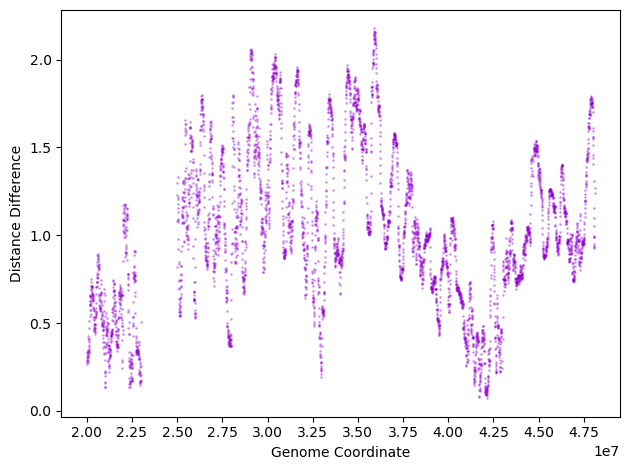

In [8]:
# Plotting the distances as a function of the general genome coordinate
plt.scatter(k562_coord['start'], distance, facecolors='darkviolet', alpha=0.3, s=1)
plt.xlabel('Genome Coordinate')
plt.ylabel('Distance Difference')
plt.tight_layout()
plt.xticks(np.arange(k562_coord['start'][0], k562_coord['start'][5196], 2.5e6))